# Machine Learning (laboratory instruction)
## Linear regression (part 7)

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 02-Linear regression (part 7).ipynb
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal
There are two goals of this laboratory:

1. Implement Stochastic Gradient Descent (Mini-batch Gradient Descent).
2. Use ML libraries to perform Linear Regression.


### Task 0. Read the dataset from file (*0 points*).
Read the boston houses dataset using scikit-learn library.

**Tip**: You can use below code to read the data:

```python
import sklearn
import sklearn.datasets
import sklearn.model_selection

dataset = sklearn.datasets.load_boston()

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset['data'], dataset['target'], test_size=0.5, random_state=123, shuffle=True)
```



In [1]:
# >>> WRITE YOUR CODE BELOW <<<
import sklearn
import sklearn.datasets
import sklearn.model_selection

dataset = sklearn.datasets.load_boston()

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset['data'], dataset['target'], test_size=0.5, random_state=123, shuffle=True)

print(x_train.shape, x_test.shape)

(253, 13) (253, 13)


### Task 1. Implement Stochastic Gradient Descent (Mini-batch Gradient Descent).

**Tasks**: 
* 2.1. Implement the Mini-batch GD
* 2.2. Prepare the data (if needed).
* 2.3. Visualize: 
    * a) the data, 
    * b) results, 
    * c) cost functions.
* 2.4. Check how the algorithm behaves for different batch sizes.

Till now your Gradient Descent algorithm more or less looks like below:

```python
for i in range(epochs):
    yp = fun(x)
    c  = cost(yp, yt)
    w -= eta * grad(x, yt, yp)
    # ...
```

Gradient Descent performs the update for all samples at once, one time in the epoch. It may not be possible if the training dataset is large (i.e. the dataset is larger than the \[V\] RAM). The Stochastic Gradient Descent (SGD) helps with that by processing the data one-by-one and updating the weights at each iteration:

```python
for i in range(epochs):
    for j in range(len(x)):
        bx = x[j]
        by = y[j]
        yp = fun(bx)
        c  = cost(yp, by)
        w -= eta * grad(x, by, yp)
    # ...
```

Another variant is the Mini-batch Gradient Descent that uses a couple (a batch) samples at each iteration (the number of iterations equals $\lceil m / b \rceil$, where $m$ is the number of samples and $b$ is the batch size):

```python
for i in range(epochs):
    for j in range(int(np.ceil(len(x_train)/batch_size))):
        bx = x[j*batch_size:(j+1)*batch_size]
        by = y[j*batch_size:(j+1)*batch_size]
        yp = fun(bx)
        c  = cost(yp, by)
        w -= eta * grad(x, by, yp)
    # ...
```

Remarks: The Mini-batch Gradient Descent is the same as SGD if $b=1$.

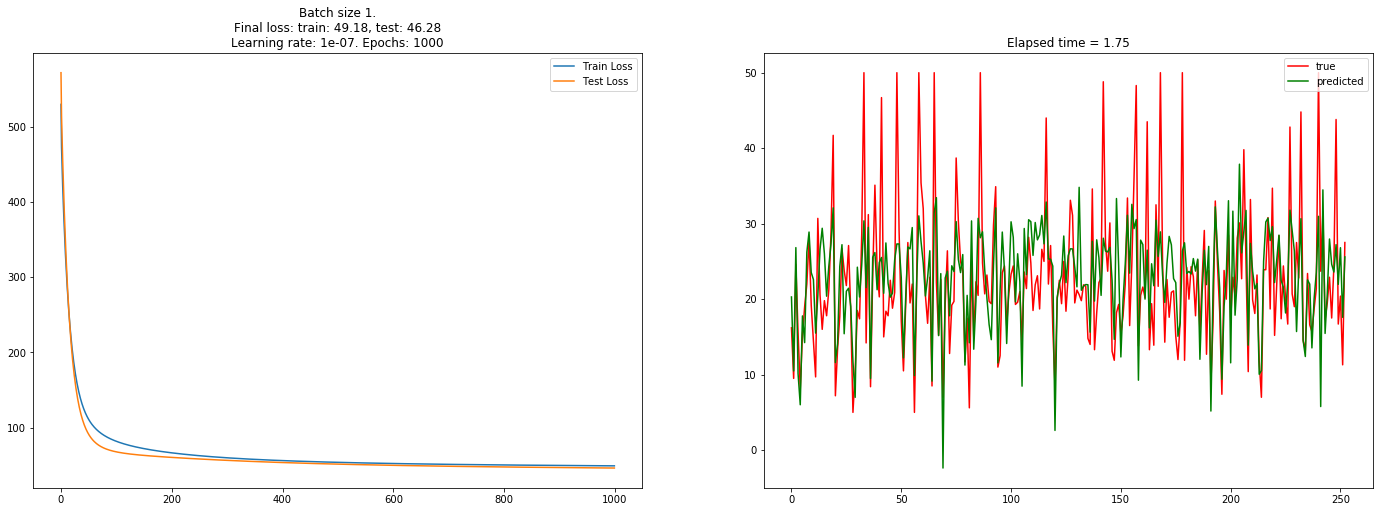

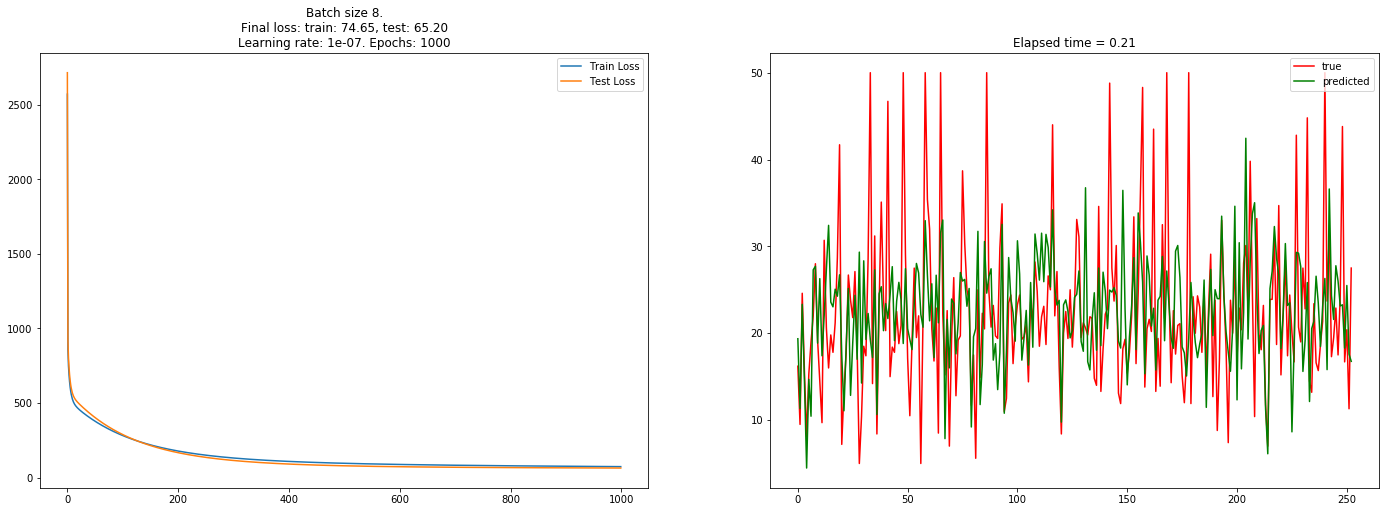

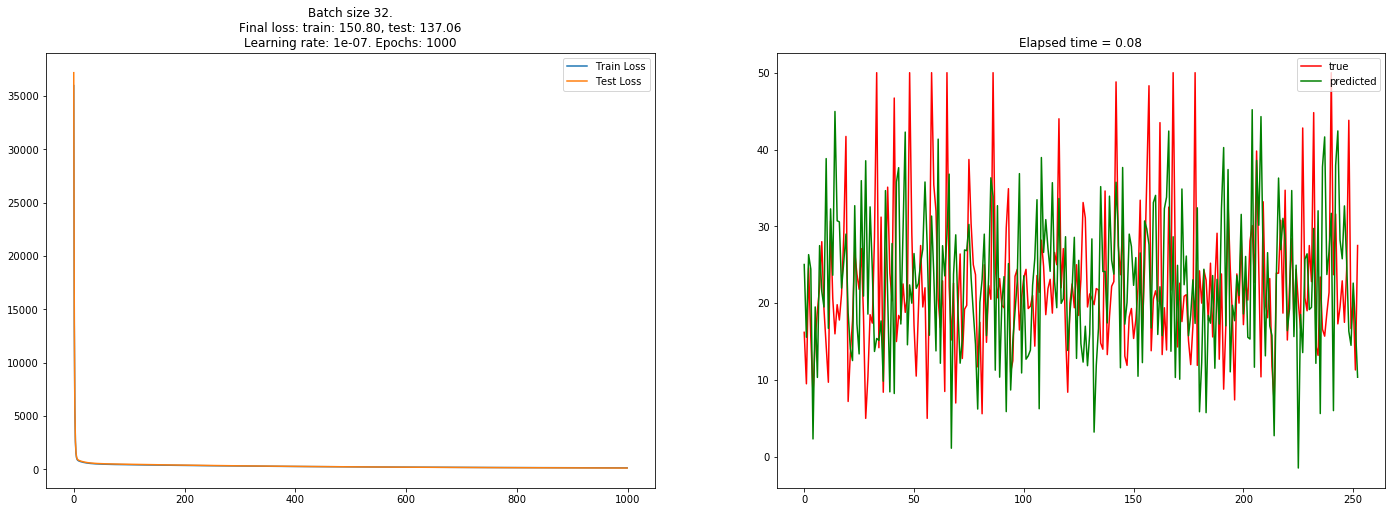

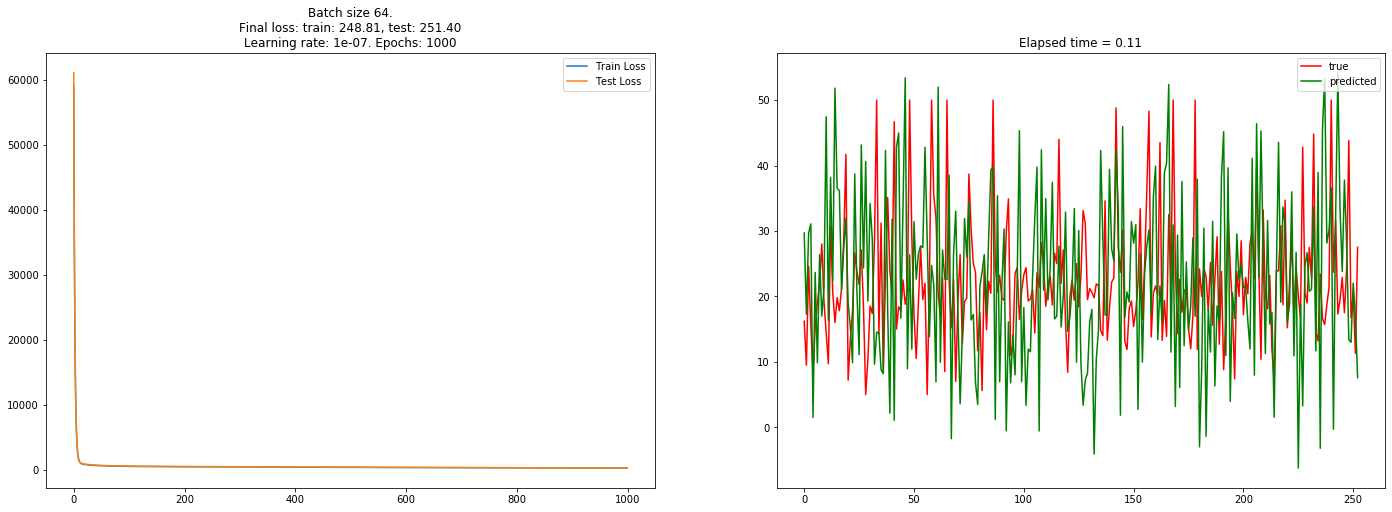

In [9]:
# >>> WRITE YOUR CODE BELOW <<<
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time

@njit
def mse(predictions, targets):
    return np.square(np.subtract(predictions, targets)).mean()

@njit
def grad(x, predictions, targets):
    return (2 / targets.shape[0]) * (x.T @ np.subtract(predictions, targets))

weights = np.random.uniform(size=(13,))
#weights = np.zeros(shape=(13,))
for batch_size in [1, 8, 32, 64]:
    t = time.time()
    fig, ax = plt.subplots(1, 2, figsize=(24, 8))
    w = weights.copy()
    lr = 1e-7
    epochs = 1000
    history = {'train': [], 'test': []}
    #batch_size = 32
    
    for i in range(epochs):
        for j in range(int(np.ceil(len(x_train)/batch_size))):
            batch_x = x_train[j*batch_size:(j+1)*batch_size]
            batch_y = y_train[j*batch_size:(j+1)*batch_size]
            predictions = batch_x @ w.T
            w -= lr * grad(batch_x, predictions, batch_y)

        train_predictions = x_train @ w.T
        test_predictions = x_test @ w.T
        history['train'].append(mse(train_predictions, y_train))
        history['test'].append(mse(test_predictions, y_test))
    ax[0].set_title(f"Batch size {batch_size}.\nFinal loss: train: {history['train'][-1]:.2f}, test: {history['test'][-1]:.2f}\nLearning rate: {lr}. Epochs: {epochs}")
    ax[0].plot(history['train'], label='Train Loss')
    ax[0].plot(history['test'], label='Test Loss')
    ax[0].legend(loc='upper right')
    ax[1].plot(np.arange(len(y_train)), y_train, color='red', label='true')
    ax[1].plot(np.arange(len(y_train)), x_train @ w.T, color='green', label='predicted')
    ax[1].legend(loc='upper right')
    ax[1].set_title(f"Elapsed time = {time.time() - t:.2f}")
    plt.show()


### Task 2. Train linear regression model.

2. Use at least two widely used ML libraries to perform Linear Regression (you may also use those that are not mentioned in the list below) and describe the differences between them:
    * Scikit-learn, a couple of options available:
        * LinearRegression 
        * SGDRegressor
        * Ridge
        * Lasso
        * ElasticNet
    * Scipy
        * scipy.linalg.lstsq
        * scipy.stats.linregress
    * Tensorflow
    * Pytorch
    * JAX



Coefficients: [ -0.1218   0.0443   0.0478  -0.5964 -13.3158   4.7079  -0.0127  -1.3588
   0.3369  -0.0127  -0.8032   0.0097  -0.5004]
Mean squared error: 137.77791494684757


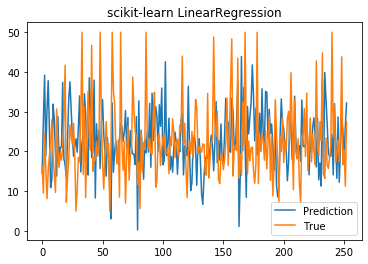

In [24]:
# >>> WRITE YOUR CODE BELOW <<<
from sklearn.linear_model import LinearRegression, Ridge, Lasso
np.set_printoptions(precision=4, suppress=True)

reg = LinearRegression().fit(x_train, y_train)
plt.title('scikit-learn LinearRegression')
prediction = reg.predict(x_test)
plt.plot(prediction, label='Prediction')
plt.plot(y_train, label='True')
plt.legend()

print(f'Coefficients: {reg.coef_}')
print(f'Mean squared error: {mse(prediction, y_train)}')

Coefficients: [-0.1195  0.0446  0.0092 -0.9278 -4.2393  4.7464 -0.0209 -1.2297  0.305
 -0.0132 -0.7297  0.01   -0.5023]
Mean squared error: 136.69481617081894


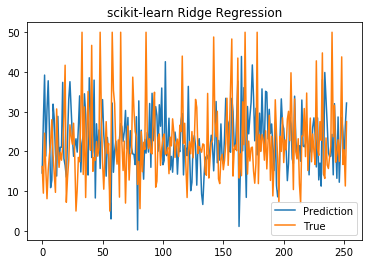

In [25]:
reg = Ridge(alpha=1.5).fit(x_train, y_train)
plt.plot(prediction, label='Prediction')
plt.plot(y_train, label='True')
prediction = reg.predict(x_test)
plt.legend()
plt.title('scikit-learn Ridge Regression')
print(f'Coefficients: {reg.coef_}')
print(f'Mean squared error: {mse(prediction, y_train)}')

Coefficients: [-0.0621  0.029  -0.     -0.     -0.      0.7562  0.0143 -0.4121  0.2306
 -0.0132 -0.5644  0.0043 -0.7557]
Mean squared error: 123.25390792033372


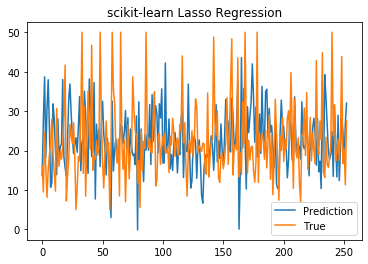

In [26]:
reg = Lasso(alpha=1.5).fit(x_train, y_train)
plt.plot(prediction, label='Prediction')
plt.plot(y_train, label='True')
prediction = reg.predict(x_test)

plt.title('scikit-learn Lasso Regression')
plt.legend()
print(f'Coefficients: {reg.coef_}')
print(f'Mean squared error: {mse(prediction, y_train)}')

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(1, input_dim=13)
model.compile(optimizer=SGD(learning_rate=1e-7) ,loss='mse',metrics=['mse'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=1, epochs=100, shuffle=False, verbose=False)


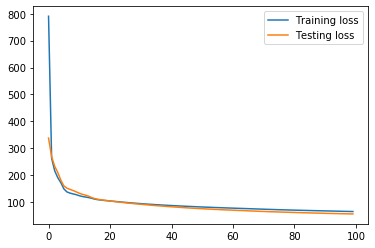

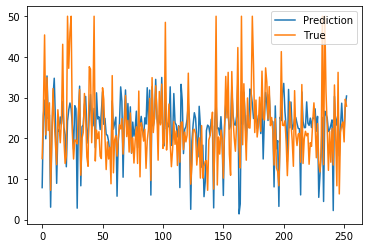

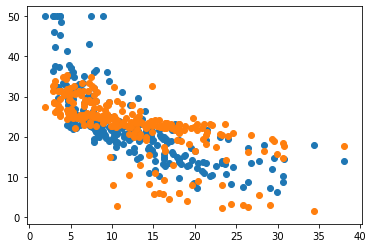

In [35]:
plt.plot(history.history['mse'], label='Training loss')
plt.plot(history.history['val_mse'], label='Testing loss')
plt.legend()
plt.show()
prediction = model.predict(x_test)
plt.plot(prediction, label='Prediction')
plt.plot(y_test, label='True')
plt.legend()
plt.show()
plt.scatter(x_test[:, 12], y_test)
plt.scatter(x_test[:, 12], prediction)


# Comparison of Regression in ML Libraries

In the above plots, two different approaches to Linear regression were tested. First ones are from scikit-learn library. Three linear regression variations were used:
1. Linear regression
2. Ridge regression
3. Lasso regression
And the fourth

## 1. Linear regression
The sklearn linear regression class is the simplest approach to linear regression. It does not feature any regularisation at all. It works out the solution analitycally, instead of iteratively, and obtains the minimised results. No regularisations however means that weights are free to grow infinitely, leading to overfitting.

## 2. Ridge regression
The ridge regression can be used by calling the Ridge class in scikit-learn. It tries to solve the overfitting problem by imposing a penalty for high values of weights. As can be seen, the weights are comparably smaller than in the case of no regularisation.

## 3. Lasso regression
The lasso regression can similarly be used by calling the Lasso class in scikit-learn. This works differently to Ridge, as it tries to build a sprase matrix of weights - reduce as many posible weight to 0 and reduce the dimensionality of the output. As can be seen, applying lasso regression resulted in 3 weights being zeroed out.

## 4. Tensorflow Approach
Tensorflow approach relies on buildng a model with the Keras API. The tensorflow model works iteratively through epochs. The loss can be set to MSE (among others) and it supports variety of optimizers. The model is then compiled and fit with the data. The results are shown epoch by epoch, and we can see the history at the end. As we can see, the results of Tensorflow approach are quite similar to those of manual linear regression implemented before.